# Análisis
Se cargan modulos y paquetes y se realiza el tratamiento de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import sys
sys.path.insert(0,'../utils')

import constants as cons
import funciones as funtils

df_gamepass = pd.read_csv(cons.DF_GAMEPASS_SRC)
df_gamepass = df_gamepass.drop(columns=[cons.RATIO, cons.TRUE_ACHIVEMENTS, cons.GAME_SCORE])
df_gamepass[cons.GAMERS] = pd.to_numeric(df_gamepass[cons.GAMERS].str.replace(',', ''), errors='coerce')
df_gamepass = df_gamepass[df_gamepass[cons.GAMERS] != 0]
df_gamepass[cons.TIME] = df_gamepass[cons.TIME].apply(funtils.calculate_mean_time)

df_metacritic = pd.read_csv(cons.DF_METACRITIC_SRC)
df_metacritic = df_metacritic.drop(columns=[cons.ID, cons.PLATFORM, cons.SORT_NO, cons.SUMMARY])

df_metacritic[cons.TITLE] = df_metacritic[cons.TITLE].str.lower()
df_gamepass[cons.GAME] = df_gamepass[cons.GAME].str.lower()
df_merged = pd.merge(df_metacritic, df_gamepass, left_on='title', right_on=cons.GAME, how='inner')
df_merged = df_merged.drop_duplicates()
df_merged = df_merged.sort_values(by=[cons.USER_SCORE, cons.COMP, cons.METASCORE], ascending=False).drop_duplicates(subset=cons.TITLE, keep='first')

df_merged = df_merged[df_merged[cons.GAMERS] >= 1000]
median_time = df_merged[cons.TIME].median()
df_merged[cons.TIME].fillna(median_time, inplace=True)

df_merged = df_merged.drop(columns=[cons.ADDED, cons.RELEASE_DATE, cons.GAME])
df_merged[cons.USER_SCORE] = df_merged[cons.USER_SCORE].apply(lambda x: 0 if not x.replace('.', '', 1).isdigit() else x)
df_merged[cons.USER_SCORE] = pd.to_numeric(df_merged[cons.USER_SCORE])

df_merged.rename(columns={cons.RATING: cons.XBOX, cons.USER_SCORE: cons.METACRITIC_USER_SCORE}, inplace=True)

df_merged['xbox_user_score'] = df_merged['xbox_user_score'] * 20
df_merged['metacritic_user_score'] = df_merged['metacritic_user_score'] * 10
df_merged['metascore'] = df_merged['metascore'].astype(float)
df_merged.reset_index(drop=True, inplace=True)

numeric_columns = df_merged.select_dtypes(include=[np.number]).columns


C:\Users\PC ELITE\AppData\Local\Temp\ipykernel_19384\536284731.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[cons.TIME].fillna(median_time, inplace=True)


Listo, ahora se continua desde donde lo dejamos

## Análisis bivariante

Para el análisis bivariante, se harán unas variables categóricas de cada variable de valoración teniendo 5 categorías para cada uno: "Muy positivas", "Positivas", "Variadas", "Negativas" y "Muy negativas"

In [2]:
# Aplicar la función a las columnas de valoración
df_merged[cons.METACRITIC_USER_SCORE_CAT] = funtils.categorize_score(df_merged[cons.METACRITIC_USER_SCORE], cons.CAT_BINS, cons.CAT_VALS)
df_merged[cons.XBOX_USER_SCORE_CAT] = funtils.categorize_score(df_merged[cons.XBOX], cons.CAT_BINS, cons.CAT_VALS)
df_merged[cons.METASCORE_CAT] = funtils.categorize_score(df_merged[cons.METASCORE], cons.CAT_BINS, cons.CAT_VALS)

df_merged.head()

,metascore,title,metacritic_user_score,GAMERS,COMP %,TIME,xbox_user_score,metacritic_user_score_cat,xbox_user_score_cat,metascore_cat
0,78.0,olija,0.0,4380,14.2,4.5,66.0,Muy negativas,Positivas,Positivas
1,68.0,gang beasts,0.0,135527,9.3,1.5,58.0,Muy negativas,Variadas,Positivas
2,56.0,recompile,0.0,7808,6.1,7.0,64.0,Muy negativas,Positivas,Variadas
3,65.0,moonglow bay,0.0,4060,2.9,45.0,70.0,Muy negativas,Positivas,Positivas
4,72.0,lawn mowing simulator,0.0,33974,0.1,70.0,66.0,Muy negativas,Positivas,Positivas


### Análisis entre categóricas y numéricas

c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])
c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])


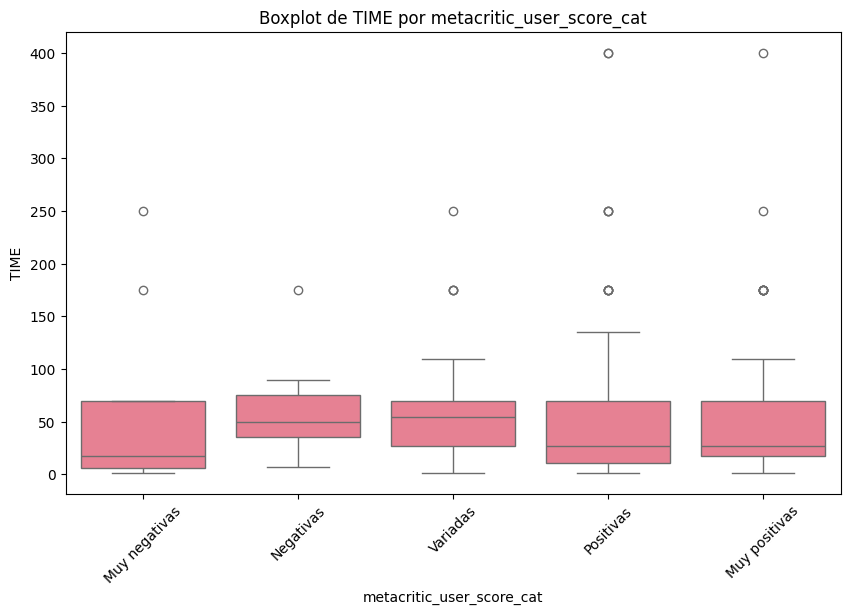

c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])
c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])


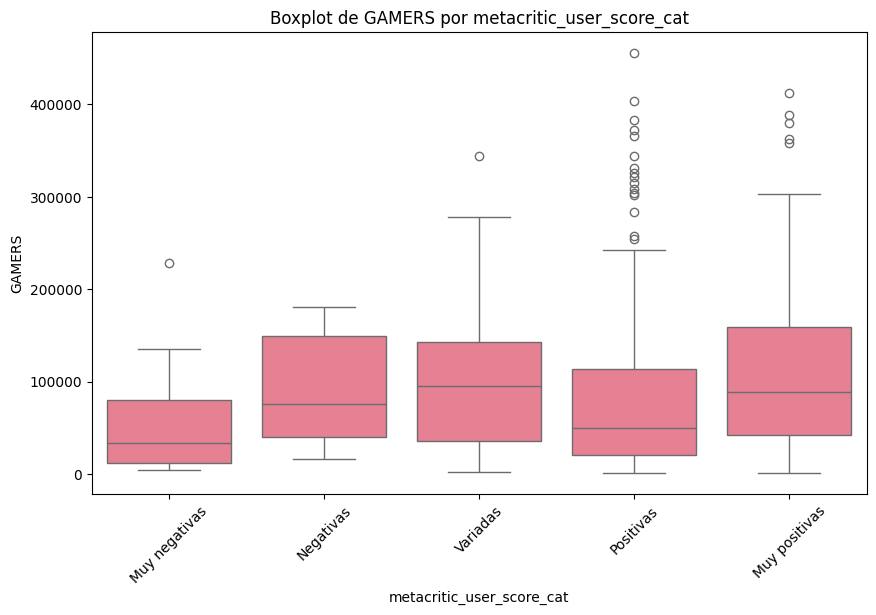

c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])
c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])


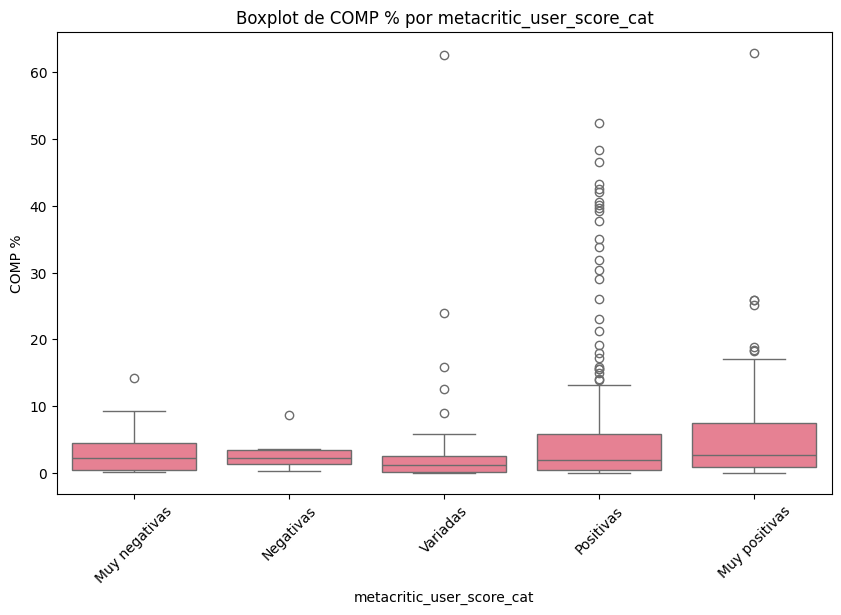

c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])
c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])


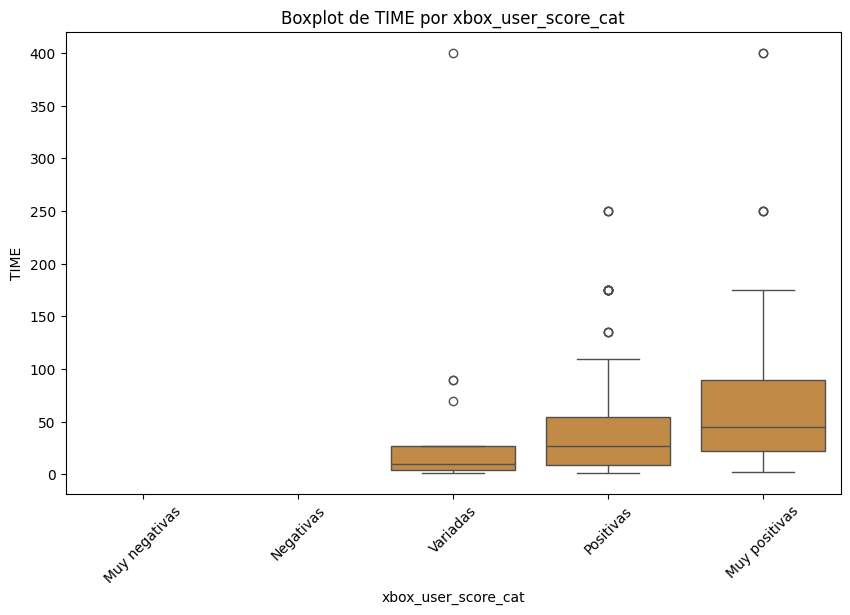

c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])
c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])


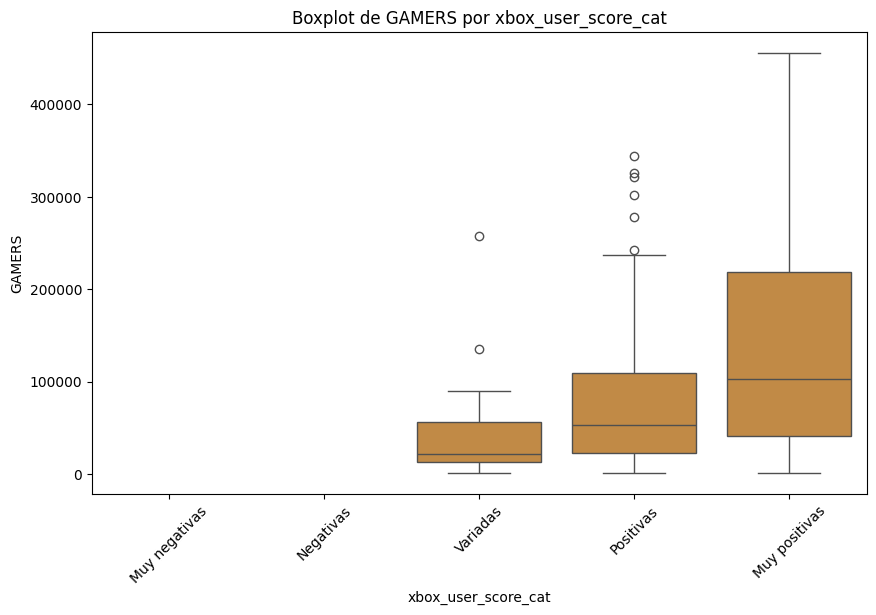

c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])
c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])


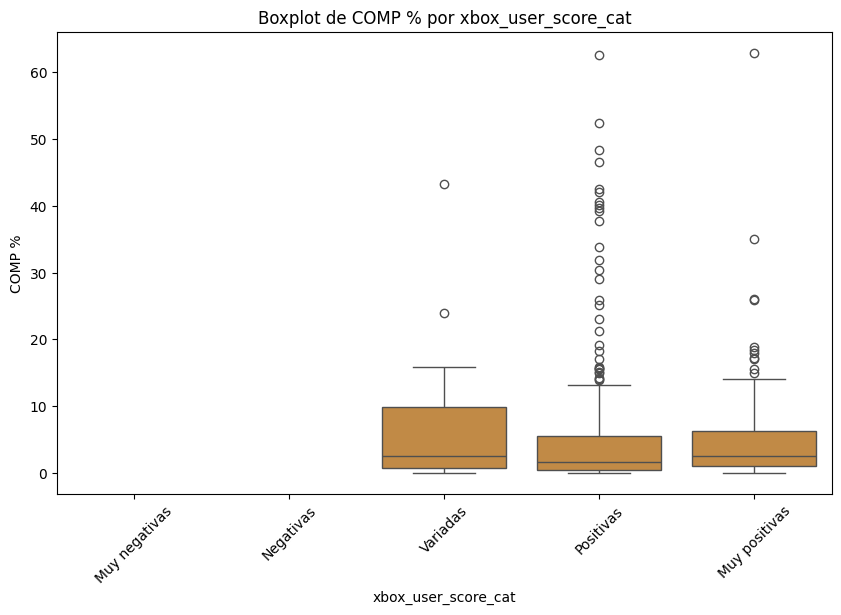

c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])
c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])


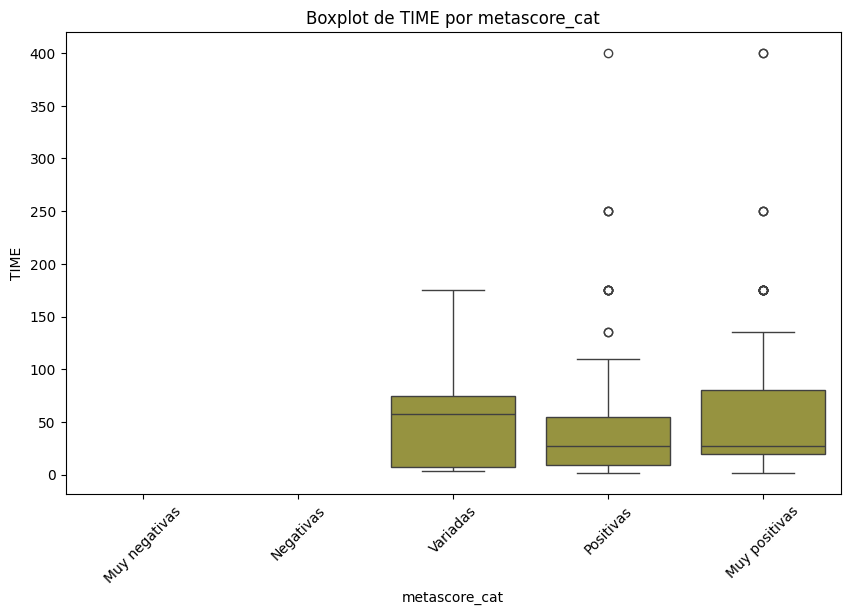

c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])
c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])


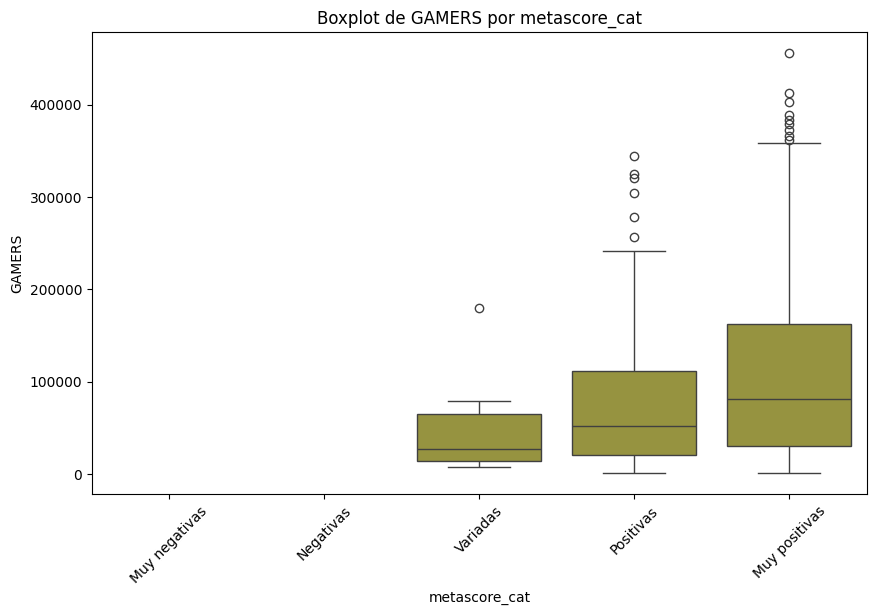

c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])
c:\Users\PC ELITE\Desktop\TheBridge\Proyectos\EjerciciosPersonales\EDA_Entrega\src\notebooks\../utils\funciones.py:59: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df[cat_col], y=df[num_col], palette=[colors[color_idx]])


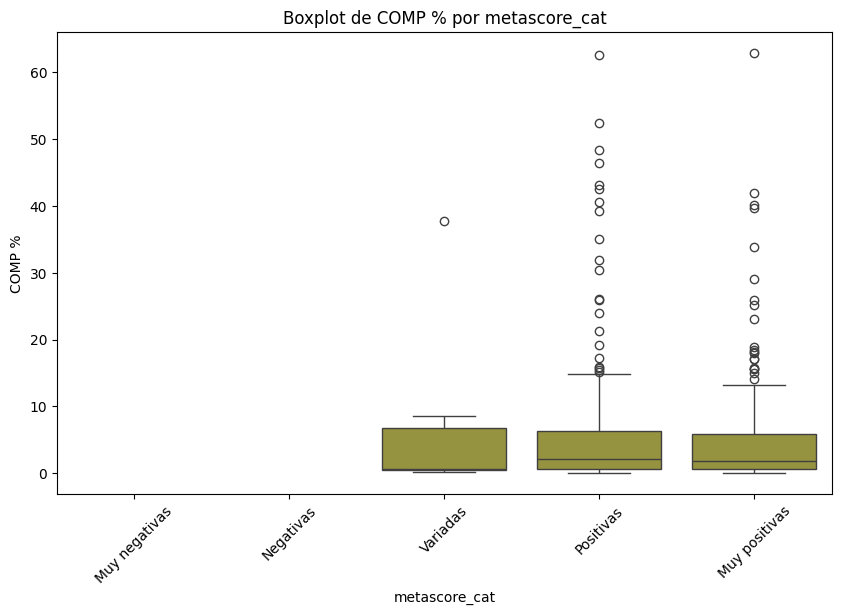

In [3]:
# Crear una lista de columnas categóricas y numéricas a analizar
categorical_columns = [cons.METACRITIC_USER_SCORE_CAT, cons.XBOX_USER_SCORE_CAT, cons.METASCORE_CAT]
numerical_columns_s = [cons.TIME, cons.GAMERS, cons.COMP]

# Llamar a la función con los datos y columnas correspondientes
funtils.plot_categorical_numerical_boxplots(df_merged, categorical_columns, numerical_columns_s)

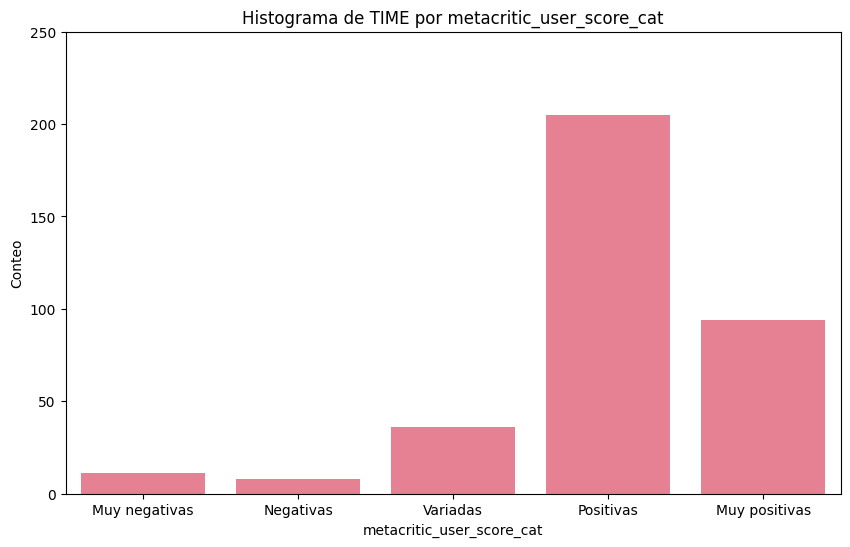

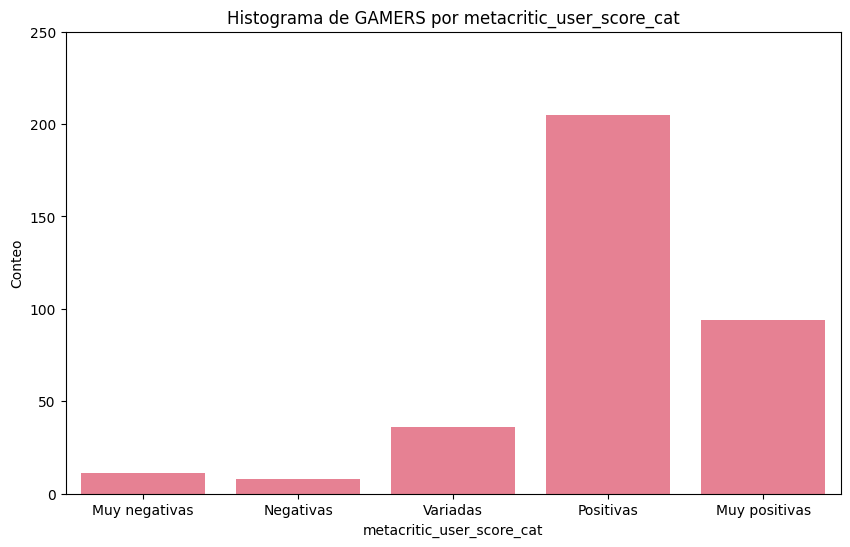

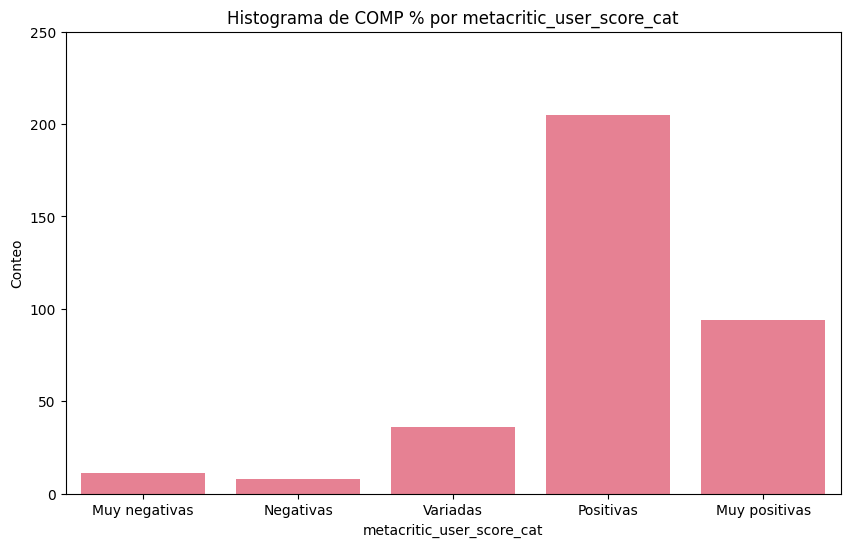

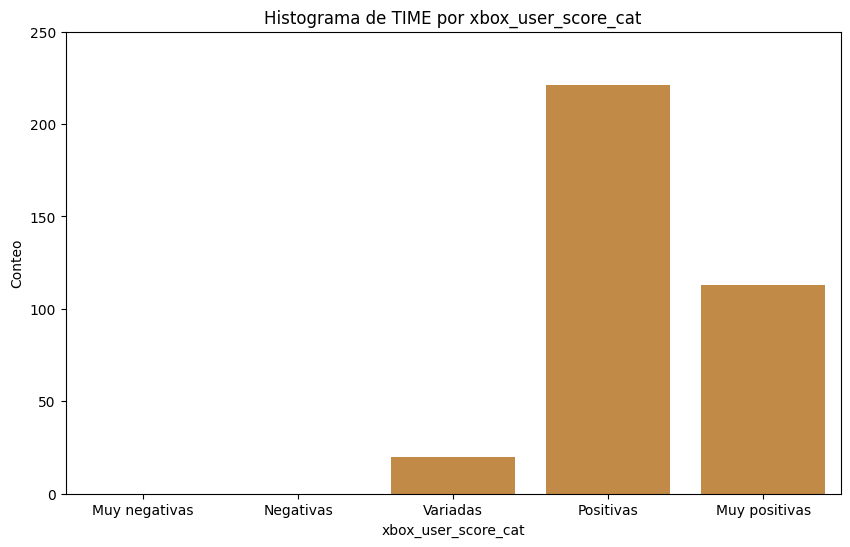

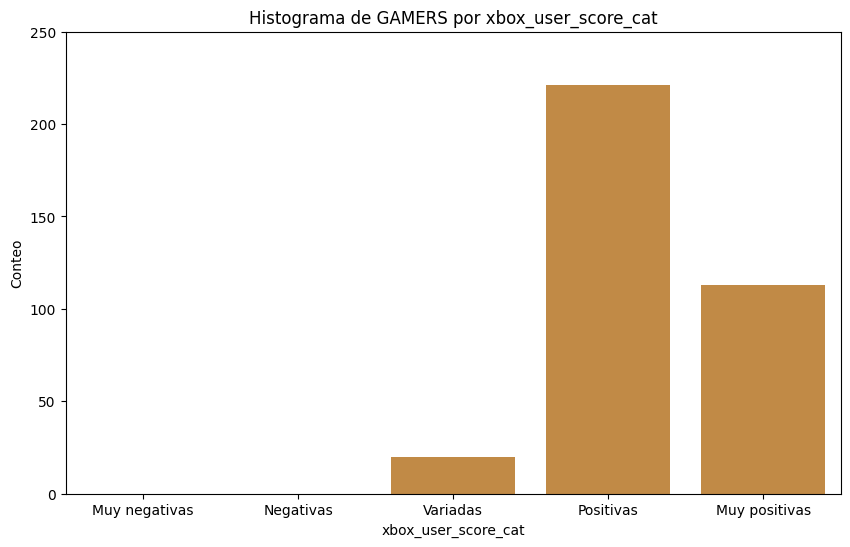

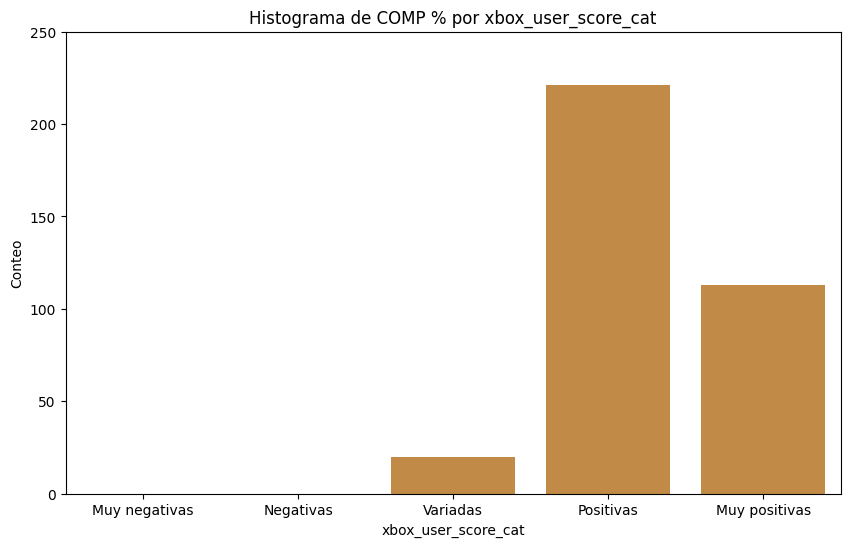

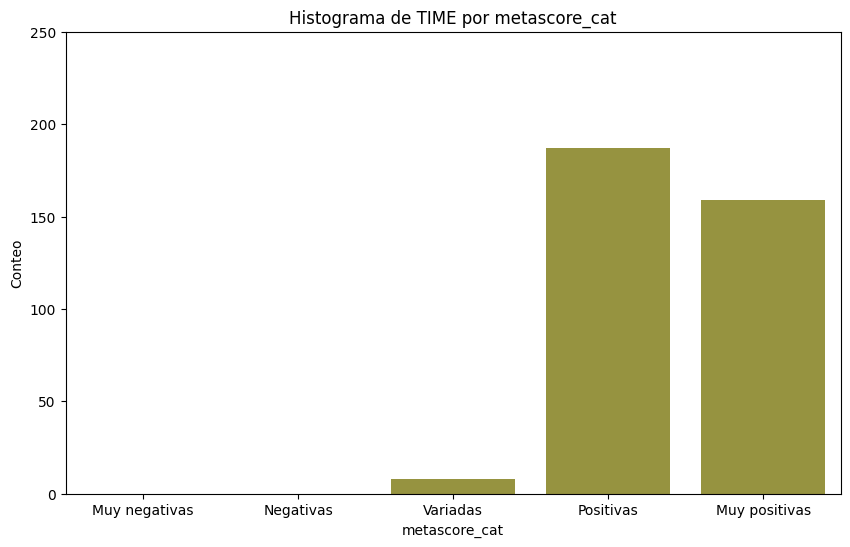

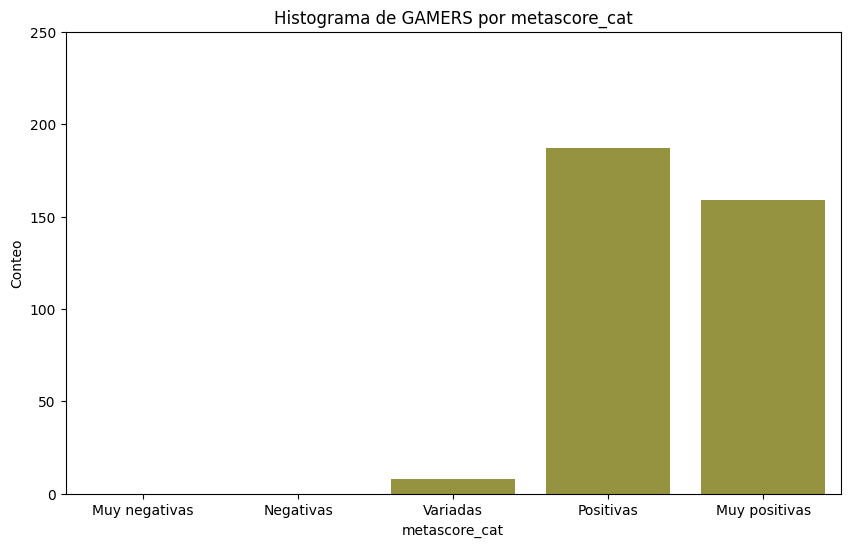

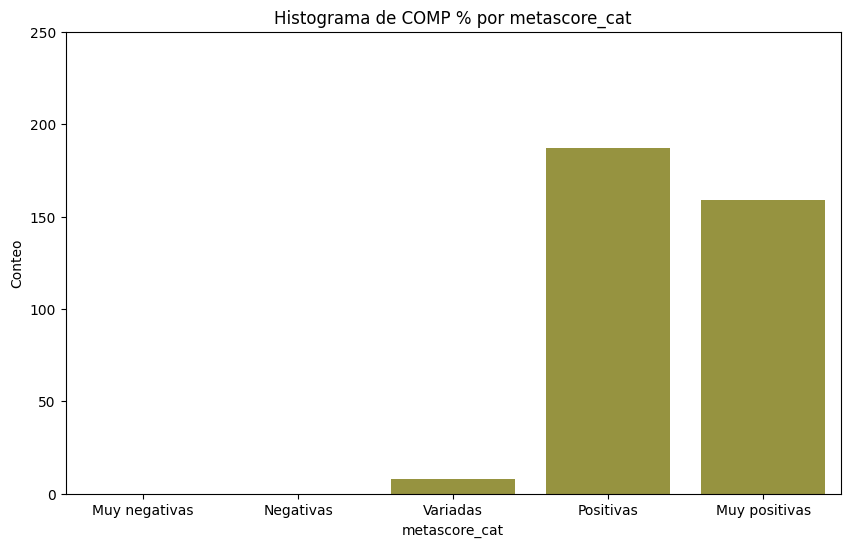

In [4]:
funtils.plot_categorical_numerical_histograms(df_merged, categorical_columns, numerical_columns_s)

In [5]:
# Se revisarán algunos registros en los que metacritic_user_score_cat es muy negativo y ver si son valores igual a cero
df_merged[(df_merged[cons.METACRITIC_USER_SCORE_CAT] == 'Muy negativas')].sort_values(by=cons.METACRITIC_USER_SCORE_CAT, ascending=False)

,metascore,title,metacritic_user_score,GAMERS,COMP %,TIME,xbox_user_score,metacritic_user_score_cat,xbox_user_score_cat,metascore_cat
0,78.0,olija,0.0,4380,14.2,4.5,66.0,Muy negativas,Positivas,Positivas
1,68.0,gang beasts,0.0,135527,9.3,1.5,58.0,Muy negativas,Variadas,Positivas
2,56.0,recompile,0.0,7808,6.1,7.0,64.0,Muy negativas,Positivas,Variadas
3,65.0,moonglow bay,0.0,4060,2.9,45.0,70.0,Muy negativas,Positivas,Positivas
4,72.0,lawn mowing simulator,0.0,33974,0.1,70.0,66.0,Muy negativas,Positivas,Positivas
348,82.0,ea sports ufc 4,20.0,66145,0.5,17.5,68.0,Muy negativas,Positivas,Muy positivas
349,66.0,star wars battlefront ii,19.0,228476,1.7,70.0,76.0,Muy negativas,Positivas,Positivas
350,79.0,fifa 20,18.0,93669,0.3,175.0,66.0,Muy negativas,Positivas,Positivas
351,77.0,fifa 21,15.0,38890,0.5,250.0,66.0,Muy negativas,Positivas,Positivas
352,70.0,madden nfl 22,6.0,15217,2.2,3.5,54.0,Muy negativas,Variadas,Positivas


La mitad de registros que son catalogados como "Muy Negativo" en `metacritic_user_score_cat`  tienen un valor de cero en su homólogo numérico. Puede significar que hay usuarios que no han  calificado esos títulos.

### Análisis entre numéricas

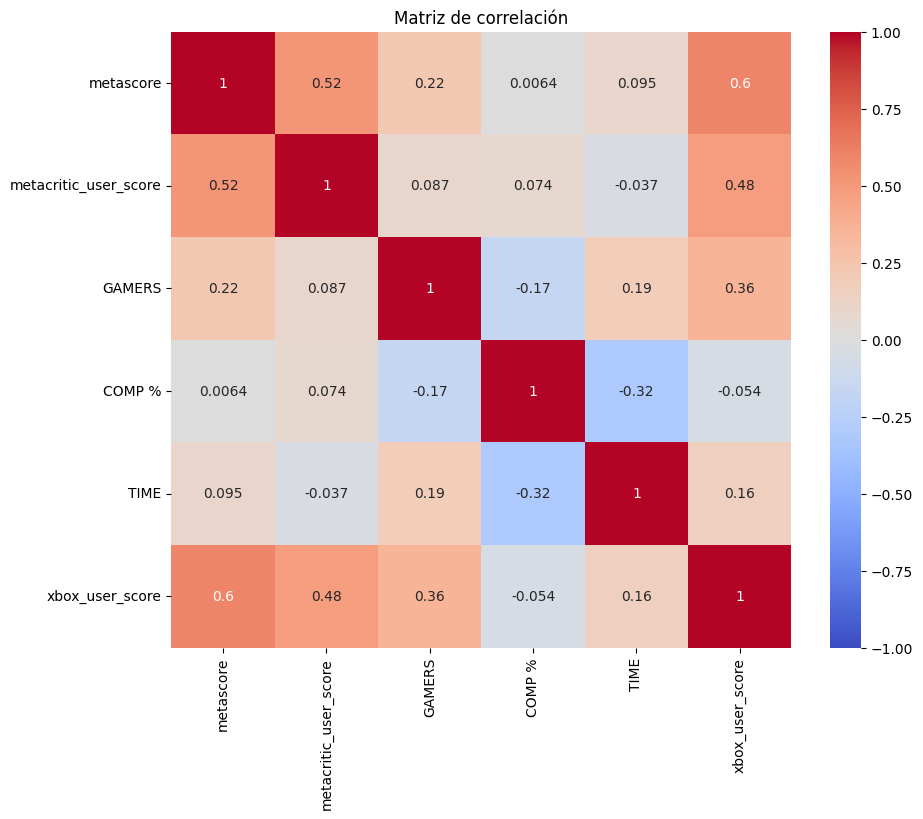

In [6]:
# Calcular la matriz de correlación
correlation_matrix = df_merged[numeric_columns].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()


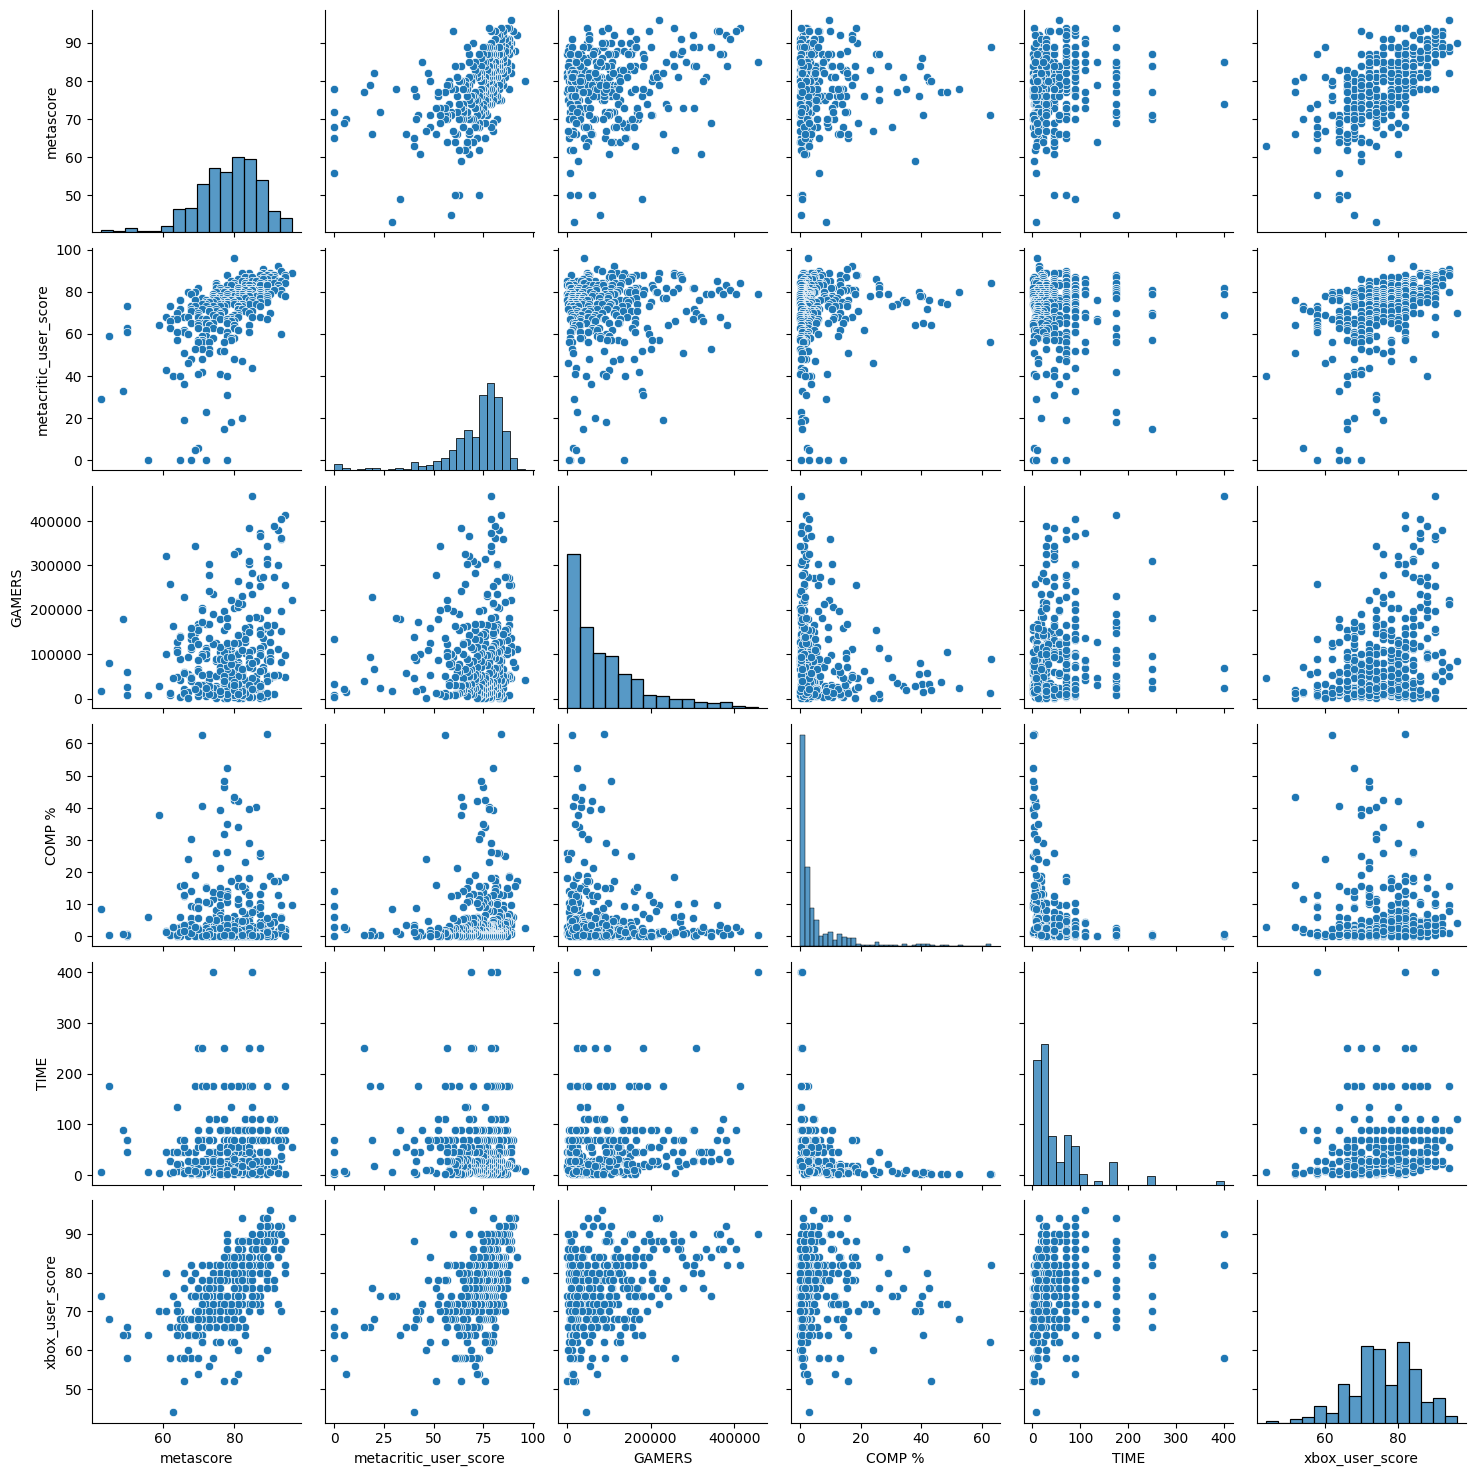

In [7]:
# Visualizar gráficos de dispersión para cada par de variables numéricas
sns.pairplot(df_merged[numeric_columns])
plt.show()

Del análisis bivariante, se puede concluir lo siguiente:
* No hay alguna correlación significativa entre las variables numéricas.
* Al hacer las variables de valoración a tipo categóricas, se puede observar tanto en los histogramas como en los boxplot que las valoraciones de los usuarios de metacritic son distintos a los de los usuarios de Xbox y críticos de  Metacritic. Esto nos podría suponer que la opinión de usuarios de Metacritic no es muy confiable. Además, en un acercamiento a los registros con la categoría "Muy negativo" casi la mitad no tenían  calificación así que se puede suponer que los usuarios no se han tomado el tiempo para poder calificar  los títulos.
* Los títulos con valoraciones "Positivas" tienen grandes números de jugadores, porcentajes de jugadores que lo han completado y tiempo medio para completar. Entonces podemos tener una  afirmación  de que los jugadores aprovechan el servicio de Game Pass para jugar títulos muy bien valorados.
